<a href="https://colab.research.google.com/github/Mahesh527784/ASA_Solutions/blob/main/PoliceKillingUS(03-12-2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**importing the data from file.**


**Cleaning Data**

In [5]:
data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')
#or
#data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='ISO-8859-1')
#or
#data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='cp1252')
data.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


**dependancy for city and state**

In [14]:


# Check for missing values in 'city' and 'state' columns
print(data[['city', 'state']].isnull().sum())

# Handle missing values (e.g., drop rows with missing city or state)
data.dropna(subset=['city', 'state'], inplace=True)

# Display the dependency (you can explore further using groupby and count)
print(data.groupby('state')['city'].count())

city     0
state    0
dtype: int64
state
AK     15
AL     50
AR     26
AZ    118
CA    424
CO     74
CT      9
DC     11
DE      8
FL    154
GA     70
HI     11
IA     12
ID     17
IL     62
IN     43
KS     24
KY     43
LA     57
MA     22
MD     38
ME     13
MI     37
MN     32
MO     64
MS     23
MT     11
NC     69
ND      4
NE     15
NH      7
NJ     35
NM     51
NV     42
NY     45
OH     79
OK     78
OR     38
PA     51
RI      2
SC     44
SD     10
TN     59
TX    225
UT     23
VA     47
VT      3
WA     62
WI     43
WV     27
WY      8
Name: city, dtype: int64


In [8]:
# prompt: clean the data

# Drop irrelevant columns
# Fixed: Replaced 'raceethnicity' with 'race'
data.drop(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state'], axis=1, inplace=True)

# Fill missing values (example: fill with mode for categorical columns)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Fill missing values (example: fill with mean for numerical columns)
for col in data.select_dtypes(include=['number']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert data types if needed
# Example: Convert a column to numeric
# data['column_name'] = pd.to_numeric(data['column_name'], errors='coerce')

# Handle outliers (example: using IQR)
# Calculate Q1 and Q3
# Q1 = data['column_name'].quantile(0.25)
# Q3 = data['column_name'].quantile(0.75)
# IQR = Q3 - Q1

# Define upper and lower bounds
# upper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
# data = data[(data['column_name'] >= lower_bound) & (data['column_name'] <= upper_bound)]

#Check for any remaining missing values
print(data.isnull().sum())

# Display cleaned data
print(data.head())

signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64
   signs_of_mental_illness threat_level         flee  body_camera
0                     True       attack  Not fleeing        False
1                    False       attack  Not fleeing        False
2                    False        other  Not fleeing        False
6                    False       attack          Car        False
8                    False        other  Not fleeing         True


**corelation for date and age**


In [19]:


# Assuming 'date' and 'age' are columns in your DataFrame 'data'
# and 'date' is in a format that pandas can interpret as datetime objects.

# Convert the 'date' column to datetime objects if it's not already
# (Important for correct analysis)
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the date column
data['year'] = data['date'].dt.year

# Calculate the correlation between 'year' and 'age'
correlation = data['year'].corr(data['age'])

print(f"Correlation between year and age: {correlation}")

Correlation between year and age: -0.002618649399627085


** association for gender age**

In [18]:
# prompt:  association for gender age

import pandas as pd

# Assuming your data is in a DataFrame called 'data'
# and it contains columns 'gender' and 'age'

# Calculate the association between gender and age
# using a contingency table (cross-tabulation)
contingency_table = pd.crosstab(data['gender'], data['age'])

contingency_table

# You can further analyze this table:
# - Calculate proportions within each gender group
# - Visualize the distribution of ages for each gender using a bar plot or histogram
# - Perform statistical tests (e.g., Chi-square test) to determine if there is a statistically significant association between gender and age


# Example visualization using seaborn
#import seaborn as sns
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
#sns.countplot(x='age', hue='gender', data=data)
#plt.title('Distribution of Age by Gender')
#plt.xlabel('Age')
#plt.ylabel('Count')
#plt.show()

age,6.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,...,74.0,75.0,76.0,77.0,79.0,80.0,82.0,83.0,86.0,91.0
gender,,,,,,,,,,,,,,,,,,,,,
F,0,1,0,0,0,1,4,1,0,1,...,0,0,0,0,0,0,0,0,0,0
M,1,0,1,1,8,15,19,53,41,40,...,2,2,5,2,1,1,2,2,2,1


**dependancy for city and state**

In [17]:
# prompt:  dependancy for city and state

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **importing the data from file.**
# You might need to adjust the file path depending on where you've saved the CSV
try:
    data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')
except FileNotFoundError:
    try:
        data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='ISO-8859-1')
    except FileNotFoundError:
        try:
            data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='cp1252')
        except FileNotFoundError:
            print("Error: 'PoliceKillingsUS.csv' not found in /content/. Please upload the file or specify the correct path.")
            # You can choose to exit the script here or handle the error differently.
            exit()


# Check for missing values in 'city' and 'state' columns
print(data[['city', 'state']].isnull().sum())

# Handle missing values (e.g., drop rows with missing city or state)
data.dropna(subset=['city', 'state'], inplace=True)

# Display the dependency (you can explore further using groupby and count)
city_state_dependency = data.groupby('state')['city'].count()
print(city_state_dependency)

#Group data by city and state, count occurences, and sort by counts
city_state_counts = data.groupby(['city', 'state']).size().reset_index(name='counts').sort_values('counts', ascending=False)

#Display the dependency.
city_state_counts





city     0
state    0
dtype: int64
state
AK     15
AL     50
AR     26
AZ    118
CA    424
CO     74
CT      9
DC     11
DE      8
FL    154
GA     70
HI     11
IA     12
ID     17
IL     62
IN     43
KS     24
KY     43
LA     57
MA     22
MD     38
ME     13
MI     37
MN     32
MO     64
MS     23
MT     11
NC     69
ND      4
NE     15
NH      7
NJ     35
NM     51
NV     42
NY     45
OH     79
OK     78
OR     38
PA     51
RI      2
SC     44
SD     10
TN     59
TX    225
UT     23
VA     47
VT      3
WA     62
WI     43
WV     27
WY      8
Name: city, dtype: int64


,city,state,counts
805,Los Angeles,CA,39
1083,Phoenix,AZ,31
632,Houston,TX,26
262,Chicago,IL,25
758,Las Vegas,NV,21
...,...,...,...
714,Knox,IN,1
713,Kirkland,WA,1
712,Kiowa,OK,1
711,Kinston,NC,1


**7 different graphs using seaborn**

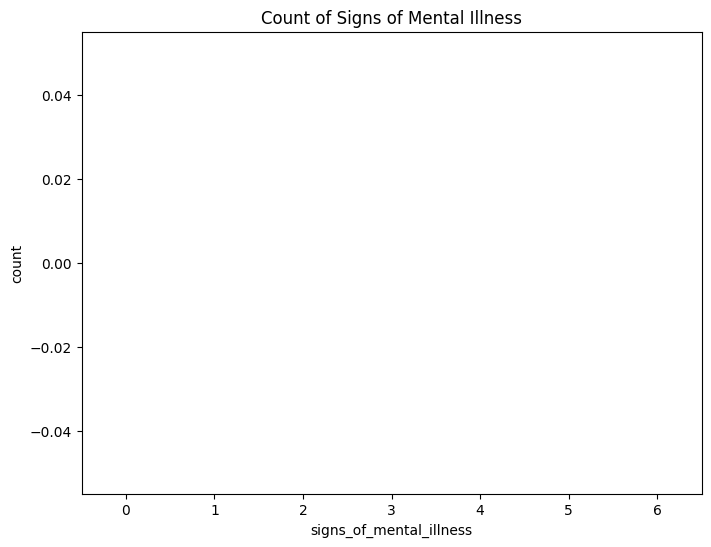

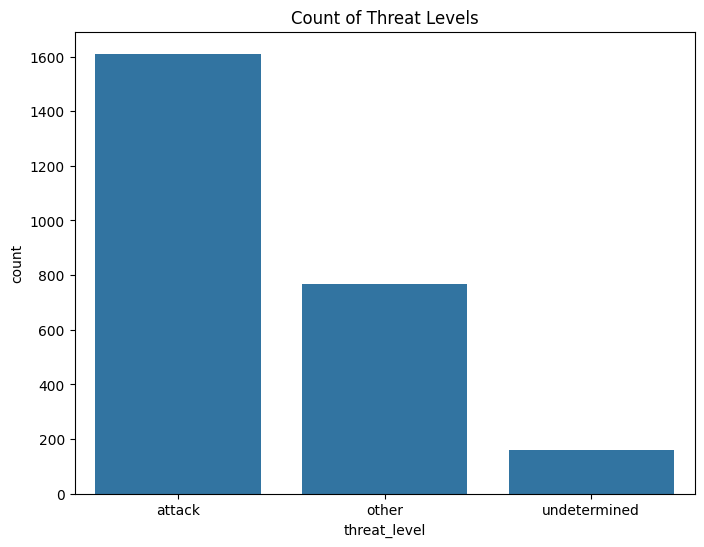

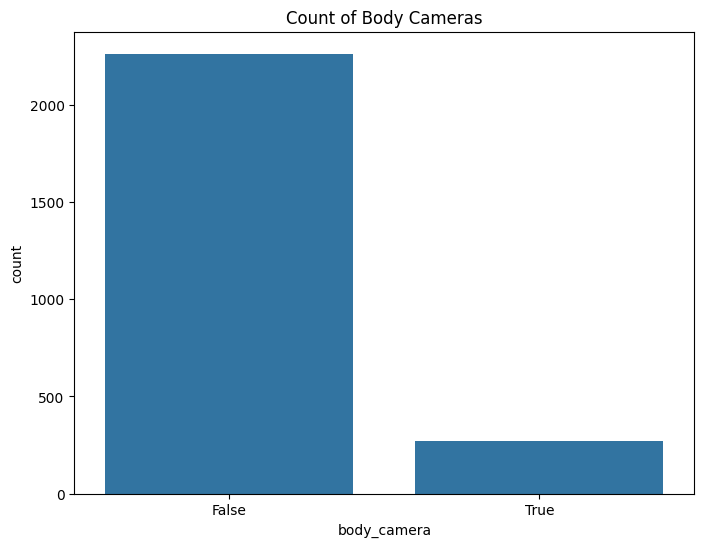

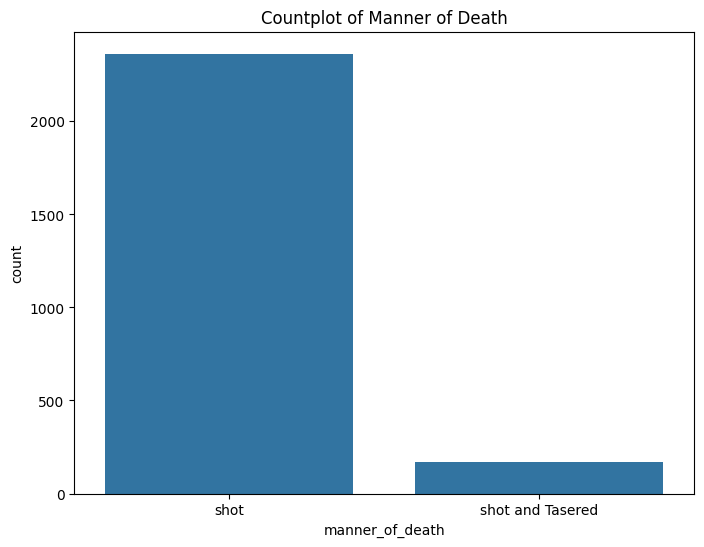

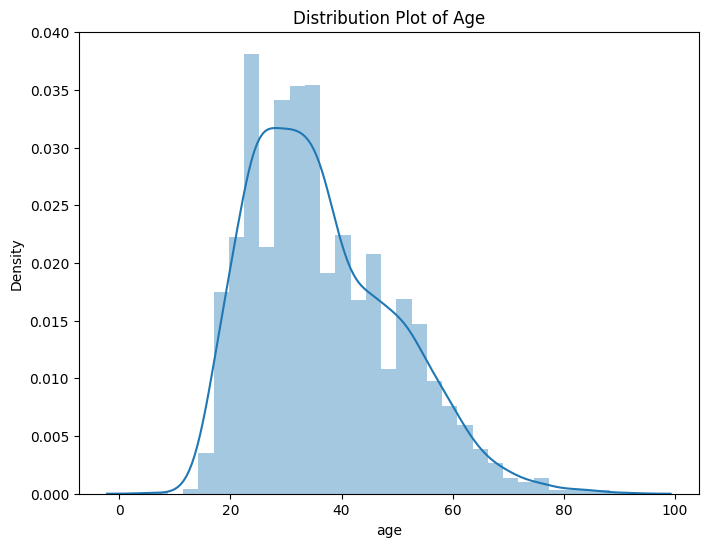

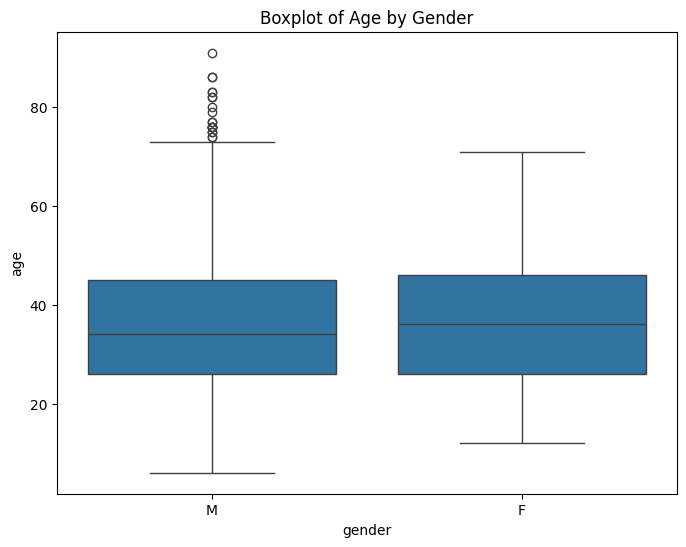

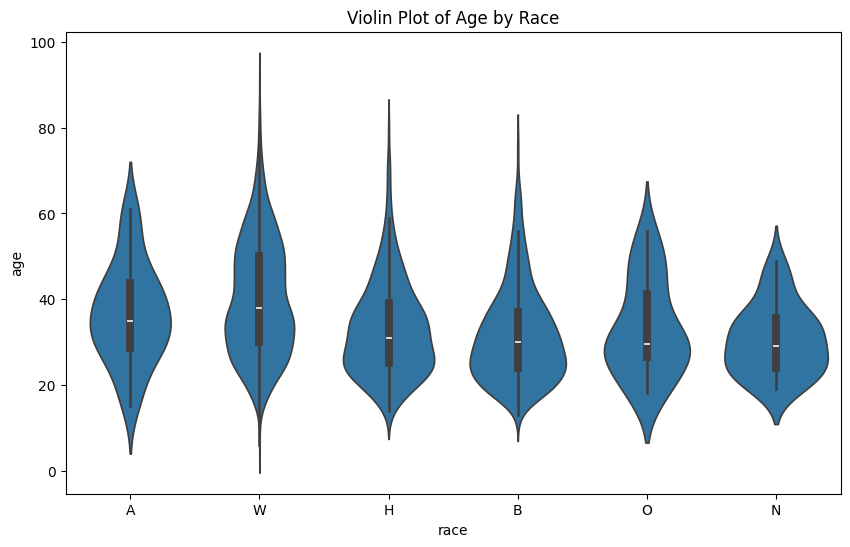

In [13]:
# prompt: 7 different graphs using seaborn

# Assuming 'data' DataFrame is already loaded and cleaned as in the previous code.

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Countplot of 'signs_of_mental_illness'
plt.figure(figsize=(8, 6))
sns.countplot(x='signs_of_mental_illness', data=data)
plt.title('Count of Signs of Mental Illness')
plt.show()

# 2. Countplot of 'threat_level'
plt.figure(figsize=(8, 6))
sns.countplot(x='threat_level', data=data)
plt.title('Count of Threat Levels')
plt.show()

# 3. Countplot of 'body_camera'
plt.figure(figsize=(8, 6))
sns.countplot(x='body_camera', data=data)
plt.title('Count of Body Cameras')
plt.show()



# 4. Countplot of manner of death
plt.figure(figsize=(8, 6))
sns.countplot(x='manner_of_death', data=data)
plt.title('Countplot of Manner of Death')
plt.show()

# 5. Distribution plot of age
plt.figure(figsize=(8, 6))
sns.distplot(data['age'], kde=True)  # Include Kernel Density Estimation (KDE)
plt.title('Distribution Plot of Age')
plt.show()


# 6. Boxplot of age by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=data)
plt.title('Boxplot of Age by Gender')
plt.show()

# 7. Violin plot of age by race
plt.figure(figsize=(10, 6))
sns.violinplot(x='race', y='age', data=data)
plt.title('Violin Plot of Age by Race')
plt.show()




# plt.figure(figsize=(8, 6))
# sns.boxplot(x='flee', data=data)  # Replace 'flee' if a different column is preferred.
# plt.title('Boxplot of Flee')
# plt.show()